# # Project: Investigate a Dataset - Tmdb-movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## INTRODUCTION
* Viewing Data
* checking properties

# Engr Kola's Notebook

In [ ]:
# Importing all the libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
# Reading and viewing the data
df = pd.read_csv("tmdb-movies.csv")
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [6]:
# checking for the number of rows and columns
df.shape

(10866, 21)

In [37]:
# checking the dataset to know the number of null values as well as the type of datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [38]:
#Checking for other properties of the dataframe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### To determine the number of unique values

In [39]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

checking for columns with missing values

In [8]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

* filling NAN Value with others

* columns with NAN values contain string so no mathematical operation was performed

In [10]:
df.fillna("others", inplace=True) 

In [42]:
#checking to ensure NAN values have been replaced with others
df.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

## Date Wrangling

* Cleaning Data
* Checking for missing Values
* Preparing data for Exploratory data analysis

In [43]:
# Homepage has a lot of missing values so it will be dropped, id columns will be dropped as well
df.drop(["homepage"], axis=1, inplace=True)
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [44]:
#converting release date to date time, so I can better analyze the data.
pd.to_datetime(df["release_date"]).head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [45]:
# Dropping the Id columns because i won't be considering them for Analysis
df.drop(["id", "imdb_id"], axis=1, inplace=True)

In [46]:
df.head(1)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [14]:
# checking to see the amount of money made bar the budget of the movie
df["profit/loss"] = df["revenue"] - df["budget"]

In [48]:
#Checking to see the changes made
df.head(1)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit/loss
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810


#### * Working on the datetime data to create a new column for day and month of release

#### Day of Release

In [49]:
df['release_date'] =pd.to_datetime(df['release_date'])

In [50]:
df['release_date'].dt.day_of_week
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day_of_release'] = df['release_date'].dt.day_of_week.apply(lambda x : days[x])

#### Month of Release

In [51]:
df['release_date'].dt.month
months = {1:'Jan', 2:'Feb', 3:'Mar',4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
df['month_of_release'] = df['release_date'].dt.month.apply(lambda x : months[x])

In [52]:
#Checking dataframe to see changes made
df.head(2)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit/loss,day_of_release,month_of_release
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,...,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Tuesday,June
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,...,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,Wednesday,May


In [53]:
# Dropping some additional columns
df_to_work = df.drop(["original_title", "cast", "tagline", "keywords", "overview", "release_date"], axis=1)
df_to_work.head(2)

,popularity,budget,revenue,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit/loss,day_of_release,month_of_release
0,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Tuesday,June
1,28.419936,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,Wednesday,May



## Exploratory Data Analysis

### Questions to be answered

* What genre of movies are most popular?
* What features influences the revenue made from movies?
* Does the director of the movie have an effect on popularity rating?
* Is there a relationship between the production company and the budget allocated?
* What factors affect revenue?
* Does release date have anything to do with the performance in the market?

## List of Questions

#### Which directors have the most popular movies?
#### What genre of movies are most popular?
#### What features influences the revenue made from movies?
#### What are the top ten movies based on budget?
#### What are the top ten movies based on revenue?
#### On what day/month(s) were movies released the most?
#### What are the number of movies released per year?


#### Majority of the plots for EDA will be done using seaborn because of ease and feel

In [54]:
# Setting Figsize for better viewing
sns.set(rc={'figure.figsize':(16,8)})

### Which directors have the most popular movies?

In [55]:
top_10_movies = df.sort_values('popularity', ascending=False).head(10)
top_10_movies.director

0                   Colin Trevorrow
1                     George Miller
629               Christopher Nolan
630                      James Gunn
2                  Robert Schwentke
631         Joe Russo|Anthony Russo
1329                   George Lucas
632     Chad Stahelski|David Leitch
3                       J.J. Abrams
633                Francis Lawrence
Name: director, dtype: object

### What genre of movies are most popular?

In [56]:
top_10_movies['genres']

0       Action|Adventure|Science Fiction|Thriller
1       Action|Adventure|Science Fiction|Thriller
629               Adventure|Drama|Science Fiction
630              Action|Science Fiction|Adventure
2              Adventure|Science Fiction|Thriller
631              Action|Adventure|Science Fiction
1329             Adventure|Action|Science Fiction
632                               Action|Thriller
3        Action|Adventure|Science Fiction|Fantasy
633            Science Fiction|Adventure|Thriller
Name: genres, dtype: object

### What features influences the revenue made from movies?

In [57]:
def draw_scatter(x, y, data, title):
    """
    To draw a scatter plot
    
    Params:
    x -> X-axis
    y -> Y-axis
    data -> Dataframe
    title -> Title of the plot
    
    Return: None
    """
    sns.regplot(x=x, y=y, data=data).set(title=title);

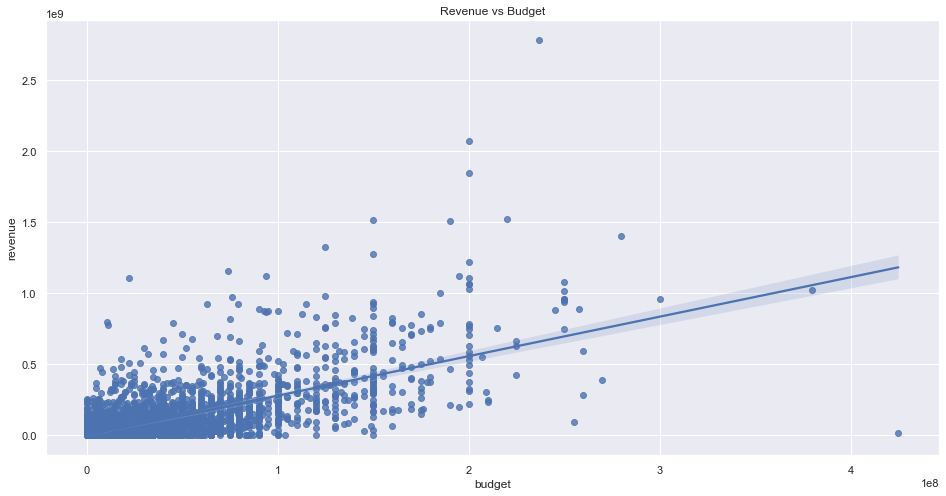

In [58]:
# Checking revenue against budget
draw_scatter(x='budget', y='revenue', data=df, title='Revenue vs Budget')

* There is a positive correlation between budget and revenue which means that an increase in budget would often yield an increase in revenue.

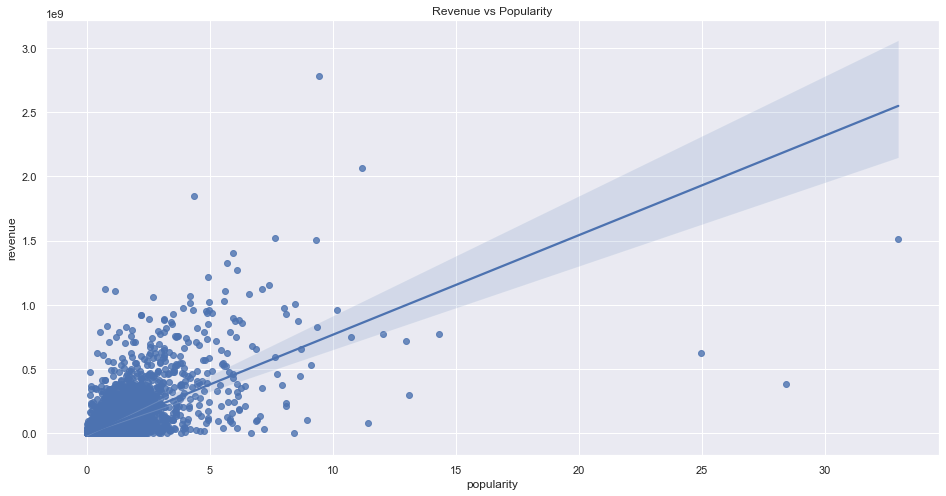

In [59]:
# checking for revenue against popularity
draw_scatter('popularity', 'revenue', df, 'Revenue vs Popularity') 

* There is also a positive correlation between popularity and revenue which means an increase in popularity will often lead to an increase in revenue. This is relatable because the more popular a movie is, more people will see it and this will result in a bigger revenue.

### Checking the popularity rating of the of the top ten movie's directors

In [94]:
dir_of_top_mov = top_10_movies.director.to_list()

In [95]:
df_dir_of_top_mov = df[df["director"].isin(dir_of_top_mov)]

In [96]:
def Box_plot(y, x, data, title):
    """
    To draw a Box plot
    
    Params:
    x -> X-axis
    y -> Y-axis
    data -> Dataframe
    title -> Title of the plot
    
    Return: None
    """
    ax = sns.boxplot(y=y, x=x, data=data);
    ax.tick_params(axis="x", rotation=90)
    plt.title(title, fontsize = 15);

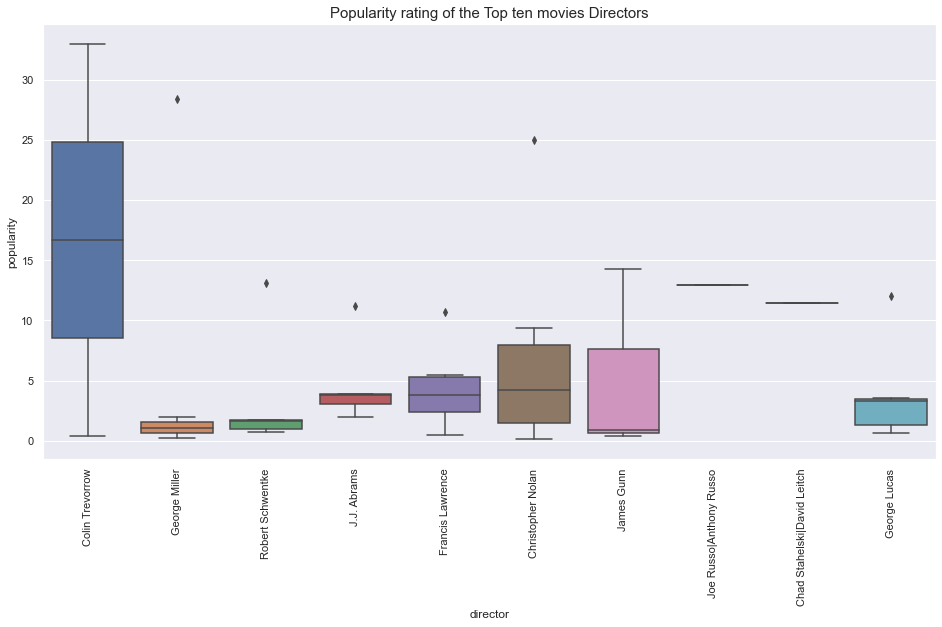

In [93]:
Box_plot(df_dir_of_top_mov.popularity, df_dir_of_top_mov.director, df_dir_of_top_mov, "Popularity rating of the Top ten movies Directors")

* Directors colin trevorrow, christopher nolan and james gunn, had the highest popularity amongst the top ten movies

#### Loooking at the top ten movie's directors based on budget

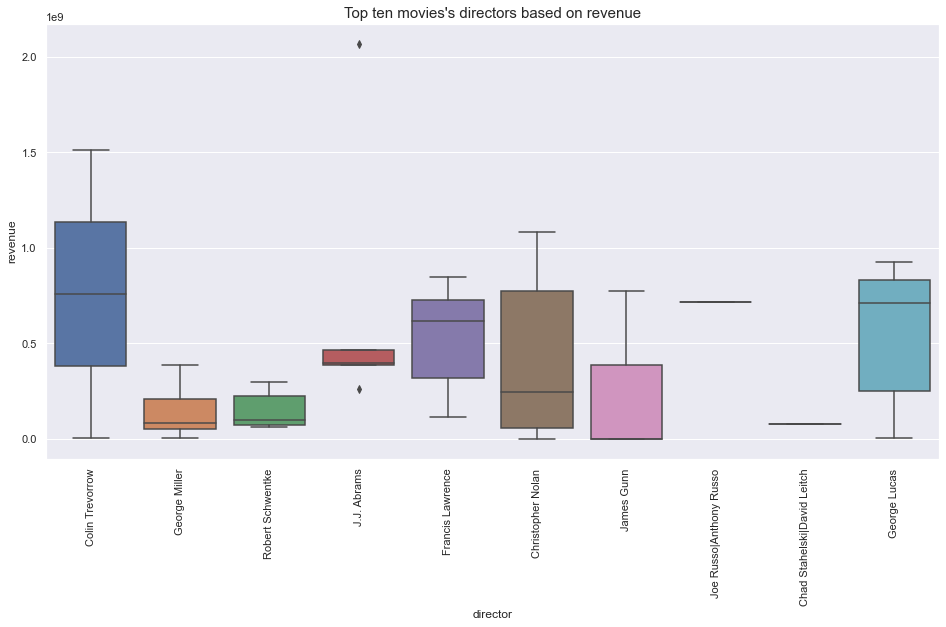

In [101]:
# Calling function Box_plot
Box_plot(df_dir_of_top_mov.revenue, df_dir_of_top_mov.director, df_dir_of_top_mov, "Top ten movies's directors based on revenue")

* directors colin trevorrow, christopher nolan and George lucas had the highest revenue amongst the top ten movie directors.

#### Loooking at the top ten movie's directors based on revenue`

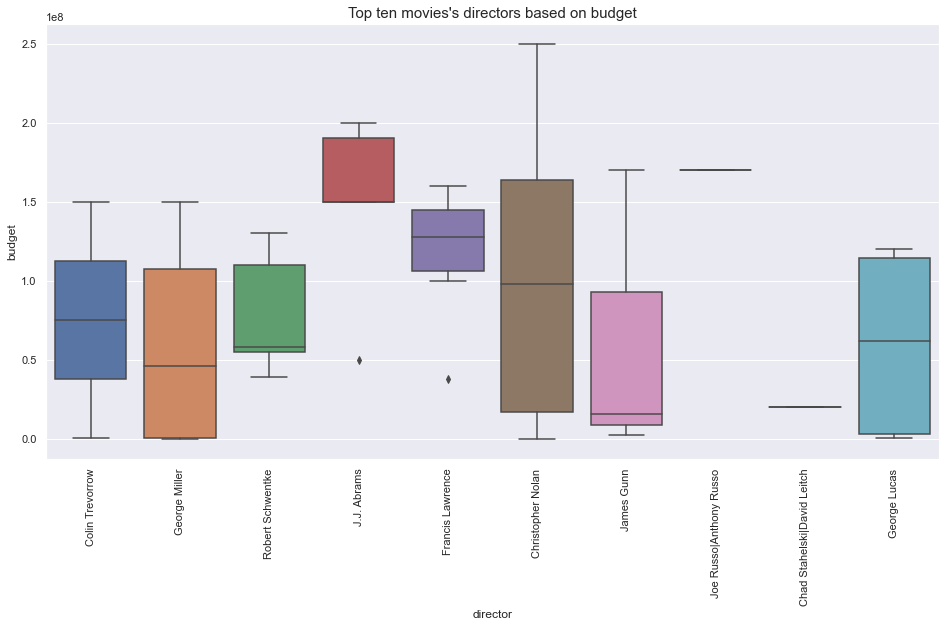

In [99]:
ax = sns.boxplot(y=df_dir_of_top_mov.budget, x=df_dir_of_top_mov.director, data=df_dir_of_top_mov)
ax.tick_params(axis="x", rotation=90)
plt.title("Top ten movies's directors based on budget", fontsize = 15);

* Director Christopher nolan had the highest budget of the top ten movie's directors

### What day were movies released the most?

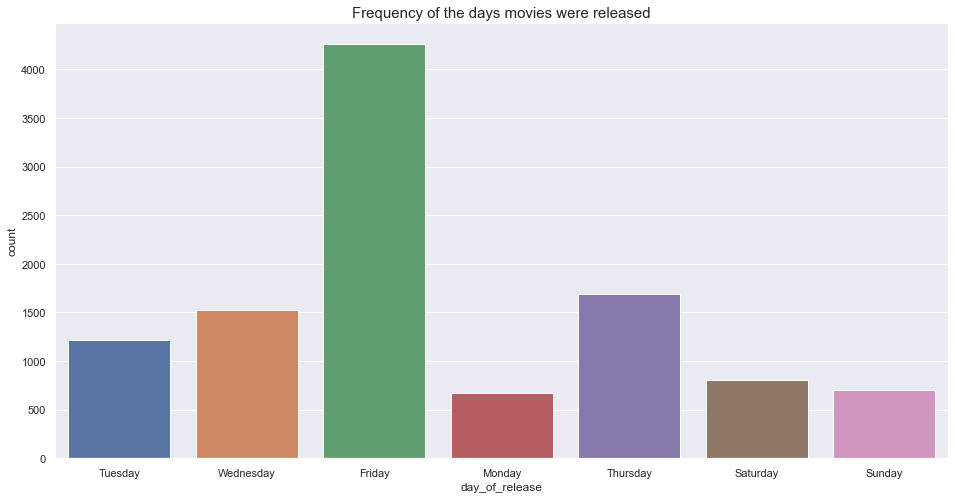

In [65]:
ax1 = sns.countplot(x=df.day_of_release, data=df)
plt.title("Frequency of the days movies were released", fontsize = 15);

* Movies were most released on fridays

In [102]:
df_dir_of_top_mov.head(2)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit/loss,day_of_release,month_of_release
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,...,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Tuesday,June
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,...,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,Wednesday,May


### Which month(s) were movies released the most?

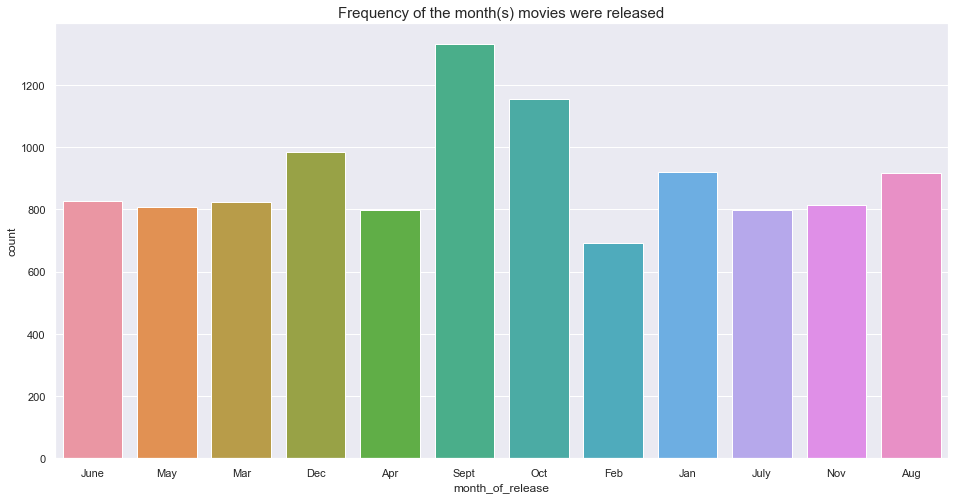

In [103]:
sns.countplot(x=df.month_of_release, data=df)
plt.title("Frequency of the month(s) movies were released", fontsize = 15);

* The months of september and october saw the highest number of movie releases

### Number of movie releases per year ?

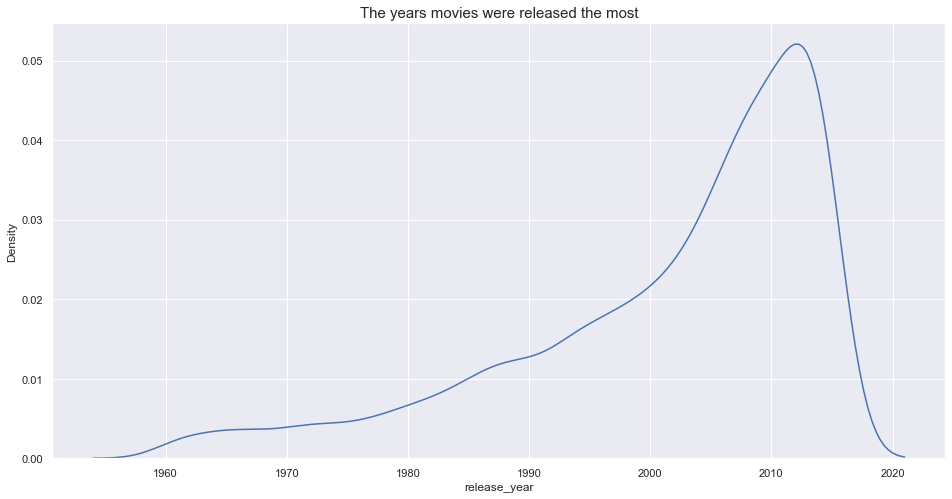

In [104]:
sns.kdeplot(data=df, x="release_year")
plt.title("The years movies were released the most", fontsize = 15);

* The years 2010 - 2013 saw the highest number of movie releases per year

## Conclusions

 * It was discovered that the directors some times have an effect on the popularity of the movie
 * Directors colin trevorrow, christopher nolan and james gunn have the highest popularity of movies in the top 10.
 * The months of september, october and december saw the highest number of releases per month.
 * The most common day for movie releases was on friday, the reason for this might be so that people can get the time to see the movies over the weekend.
 * There is a positive relationship between revenue and popularity, meaning an increase in popularity often tend to an increase in revenue.
 * There is a positive relationship between budget and revenue, meaning an increase in budget often tend to an increase in revenue.
 * The most common movie genre were Action, thriller, fiction and adventure

### Limitations to Project

* The combined nature of some of the columns makes it difficult to make conclusive distinct conclusions from them(columns like cast, production companies and keywords)